In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [15]:
# import dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [37]:
df.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: >

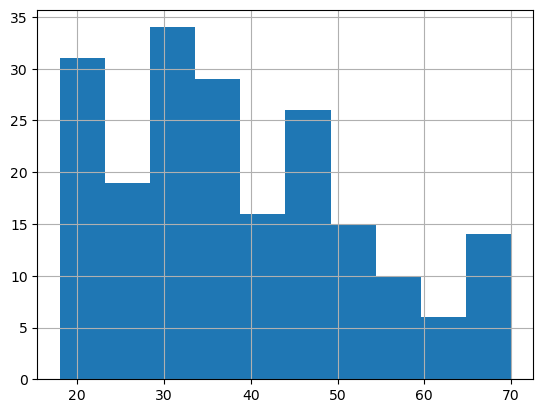

In [17]:
df.Age.hist()

In [23]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


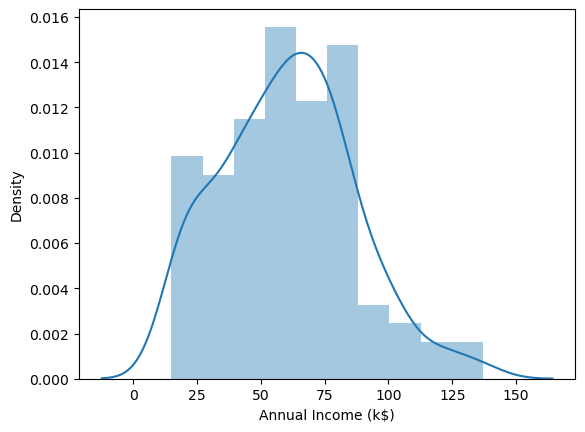

In [22]:
sns.distplot(df["Annual Income (k$)"]);

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

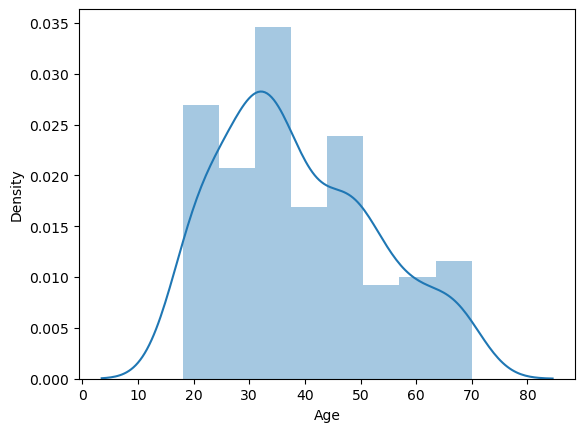

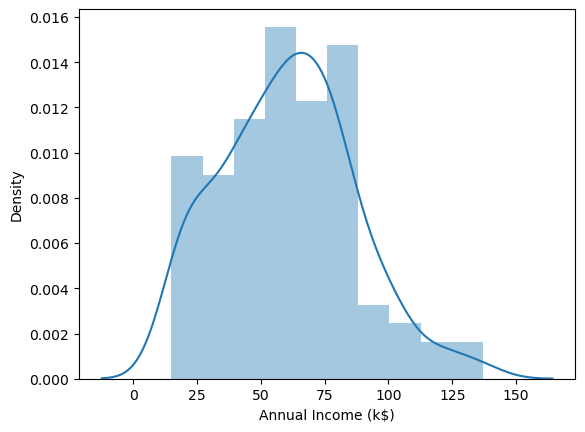

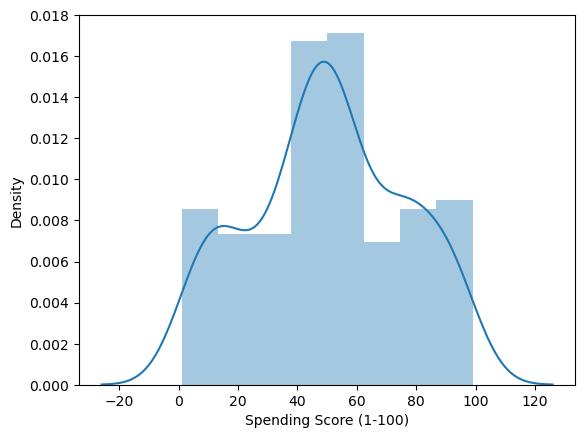

In [25]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.distplot(df[col])

In [32]:
sns.kdeplot(df["Annual Income (k$"], shade= True, hue=df["Gender"]);

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [47]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.kdeplot(df[col], shade=True, hue="Gender");

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 640x480 with 0 Axes>

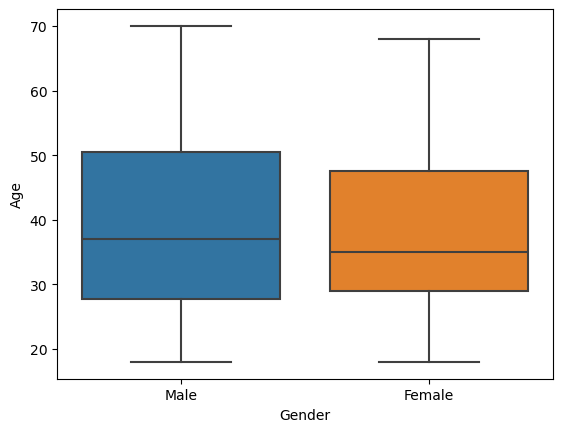

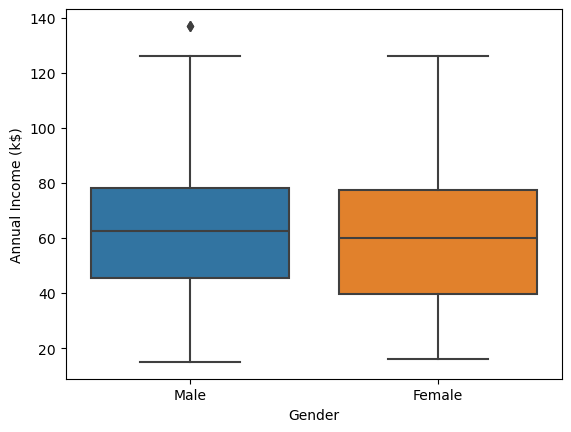

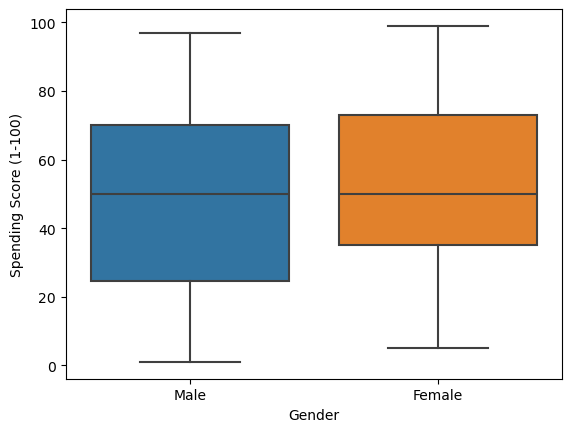

In [36]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.boxplot(data=df, x=df.Gender, y=df[col])

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

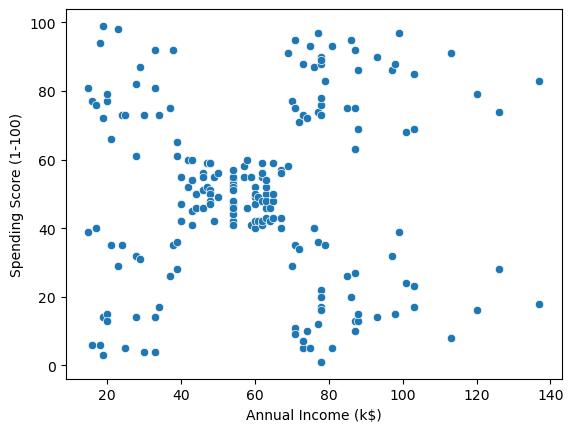

In [41]:
sns.scatterplot(data=df, x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"])

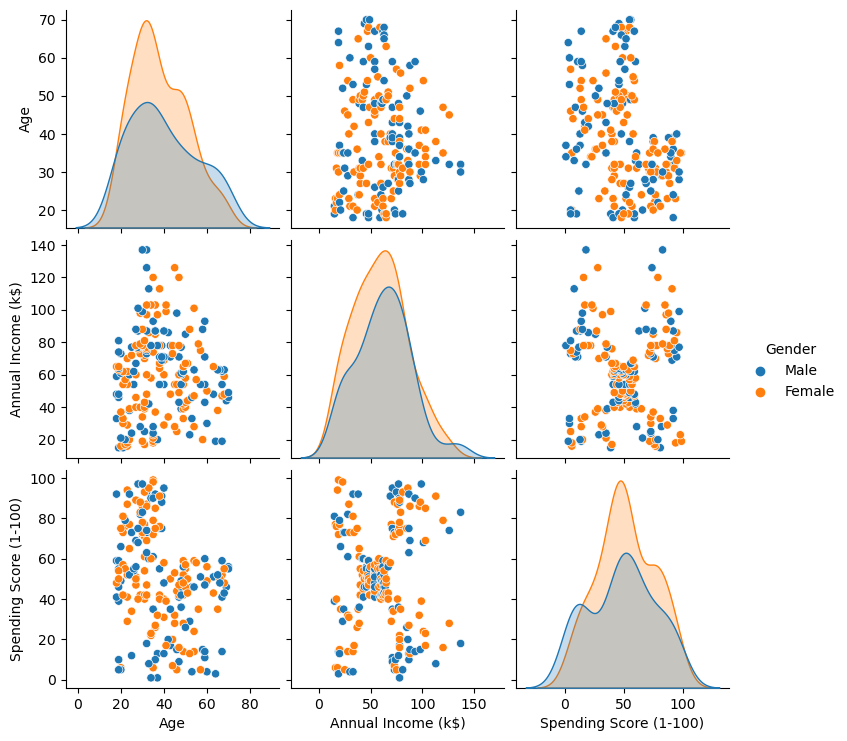

In [46]:
#df.drop("CustomerID", axis=1, inplace=True)
sns.pairplot(data=df, hue="Gender")

In [48]:
df.groupby(["Gender"])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [50]:
df[columns].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

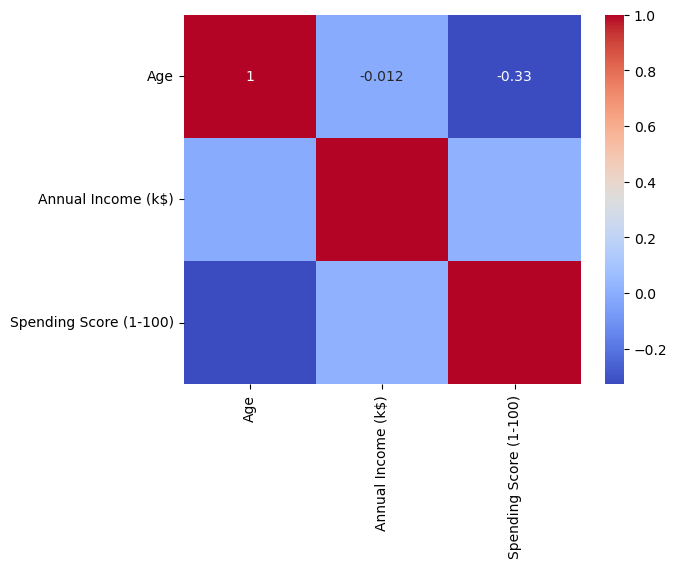

In [53]:
sns.heatmap(df[columns].corr(), annot=True,cmap="coolwarm")

## Clustering - Univariate, Bivariate and Multivariate

### Univariate clustering

In [57]:
df.Gender.dtype

dtype('O')

In [58]:
df["Gender"] =  df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [59]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [61]:
df["Gender"].dtype

dtype('int64')

In [87]:
cluster1 = KMeans()
cluster1.fit(df[["Annual Income (k$)"]])

KMeans()

In [88]:
cluster1.inertia_

2822.4996947496948

In [89]:
cluster1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [90]:
df["Income_cluster"] = cluster1.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_Spending_cluster
0,1,19,15,39,4,1
1,1,21,15,81,4,3
2,0,20,16,6,4,1
3,0,23,16,77,4,3
4,0,31,17,40,4,1
...,...,...,...,...,...,...
195,0,35,120,79,3,4
196,0,45,126,28,3,2
197,1,32,126,74,3,4
198,1,32,137,18,3,2


In [91]:
#Using elbow method
inertia_score = []

for i in range(1,12):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df[["Annual Income (k$)"]])
    inertia_score.append(Kmean.inertia_)
inertia_score

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380954,
 2831.296031746032,
 2168.4787157287155,
 1748.8686813186814,
 1324.5010822510824]

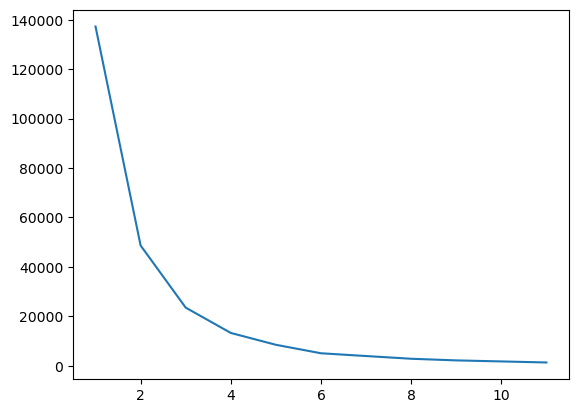

In [92]:
plt.plot(range(1,12), inertia_score )

In [93]:
df["Income_cluster"].value_counts()

Income_cluster
6    42
2    36
4    32
5    28
1    26
0    16
7    14
3     6
Name: count, dtype: int64

In [94]:
cluster1 = KMeans(n_clusters=3)
cluster1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [95]:
cluster1.inertia_

23517.330930930933

In [96]:
df["Income_cluster"] = cluster1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_Spending_cluster
0,1,19,15,39,1,1
1,1,21,15,81,1,3
2,0,20,16,6,1,1
3,0,23,16,77,1,3
4,0,31,17,40,1,1


In [97]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Income_Spending_cluster'],
      dtype='object')

In [129]:
df.groupby("Income_cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### Bivariate Clustering

In [99]:
cluster2 = KMeans()
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans()

In [100]:
df["Income_Spending_cluster"] = cluster2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_Spending_cluster
0,1,19,15,39,1,4
1,1,21,15,81,1,5
2,0,20,16,6,1,4
3,0,23,16,77,1,5
4,0,31,17,40,1,4
...,...,...,...,...,...,...
195,0,35,120,79,0,2
196,0,45,126,28,0,7
197,1,32,126,74,0,2
198,1,32,137,18,0,7


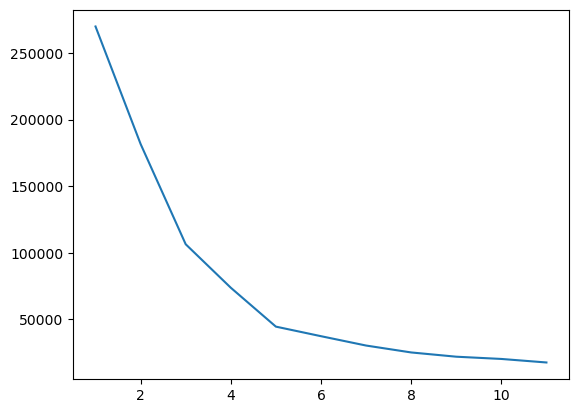

In [153]:
inertia_score2 = []

for i in range(1,12):
    Kmean2 = KMeans(n_clusters=i)
    Kmean2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(Kmean2.inertia_)

plt.plot(range(1,12), inertia_score2)
plt.savefig("elbow_bi")

In [103]:
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [104]:
df["Income_Spending_cluster"] = cluster2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_Spending_cluster
0,1,19,15,39,1,3
1,1,21,15,81,1,4
2,0,20,16,6,1,3
3,0,23,16,77,1,4
4,0,31,17,40,1,3
...,...,...,...,...,...,...
195,0,35,120,79,0,0
196,0,45,126,28,0,2
197,1,32,126,74,0,0
198,1,32,137,18,0,2


In [110]:
cluster2.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [112]:
center = pd.DataFrame(cluster2.cluster_centers_)
center.columns = ["x", "y"]

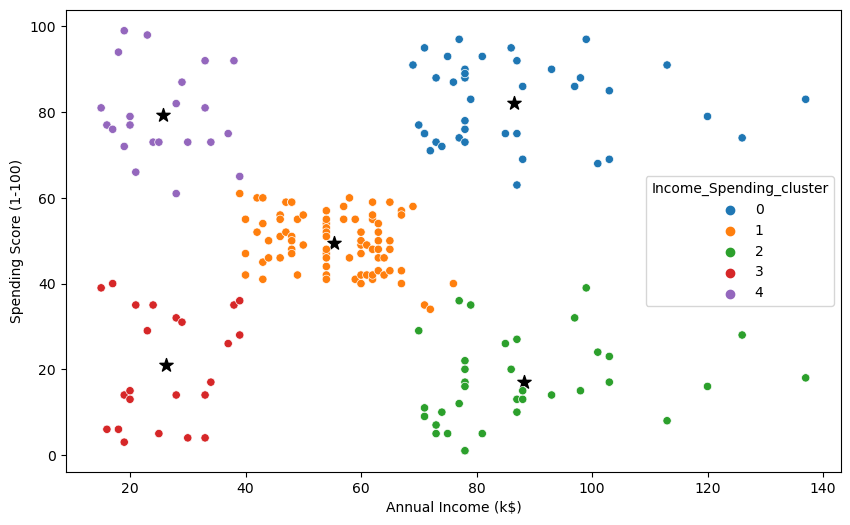

In [151]:
plt.figure(figsize=(10,6))
plt.scatter(x = center["x"], y=center["y"],s=100, c="black", marker="*")
sns.scatterplot(data=df, x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "Income_Spending_cluster", palette="tab10")
plt.savefig("bi_cluster")

In [126]:
pd.crosstab(df["Income_Spending_cluster"], df['Gender'],normalize="index")


Gender,0,1
Income_Spending_cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [128]:
df.groupby("Income_Spending_cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_Spending_cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


### Multivariate clustering

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Income_Spending_cluster'],
      dtype='object')

In [132]:
df2 = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [133]:
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [134]:
scalar = StandardScaler()
df2 = scalar.fit_transform(df2)
df2

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

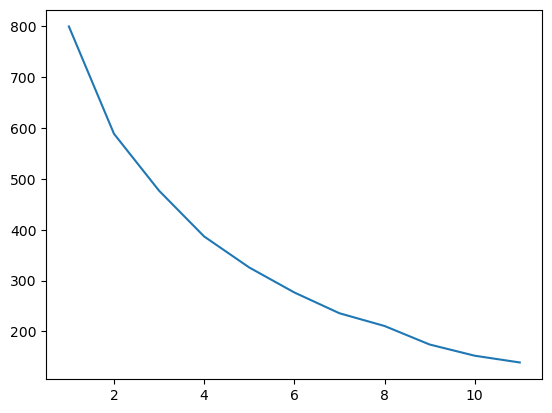

In [152]:
#Using elbow method
inertia_score3 = []

for i in range(1,12):
    Kmean3 = KMeans(n_clusters=i)
    Kmean3.fit(df2)
    inertia_score3.append(Kmean3.inertia_)
plt.plot(range(1,12), inertia_score3)
plt.savefig("elbow_multi")

In [138]:
model = KMeans(n_clusters=4)
model.fit(df2)

model.labels_

array([2, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 1, 2, 3, 0, 3, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 3, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 3, 1, 3, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2,
       1, 1, 2, 0, 3, 1, 1, 1, 3, 2, 1, 3, 0, 1, 3, 2, 3, 1, 0, 3, 1, 0,
       0, 1, 1, 2, 3, 1, 0, 2, 1, 0, 3, 2, 0, 1, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 3, 0, 1, 2, 3, 2, 1, 0,
       1, 0, 3, 0, 3, 0, 1, 0, 2, 0, 3, 0, 3, 0, 1, 2, 3, 2, 3, 2, 1, 0,
       3, 2, 3, 2, 1, 0, 3, 0, 1, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 0, 1, 2,
       2, 2], dtype=int32)

In [140]:
df["Multi_cluster"] = model.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_Spending_cluster,Multi_cluster
0,1,19,15,39,1,3,2
1,1,21,15,81,1,4,2
2,0,20,16,6,1,3,1
3,0,23,16,77,1,4,0
4,0,31,17,40,1,3,0


In [143]:
pd.crosstab(df["Multi_cluster"], df['Gender'])

Gender,0,1
Multi_cluster,,
0,57,0
1,55,0
2,0,45
3,0,43


In [142]:
df.groupby("Multi_cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Multi_cluster,,,
0,28.438596,59.666667,67.684211
1,48.109091,58.818182,34.781818
2,27.666667,64.933333,64.822222
3,52.511628,59.395349,31.441860


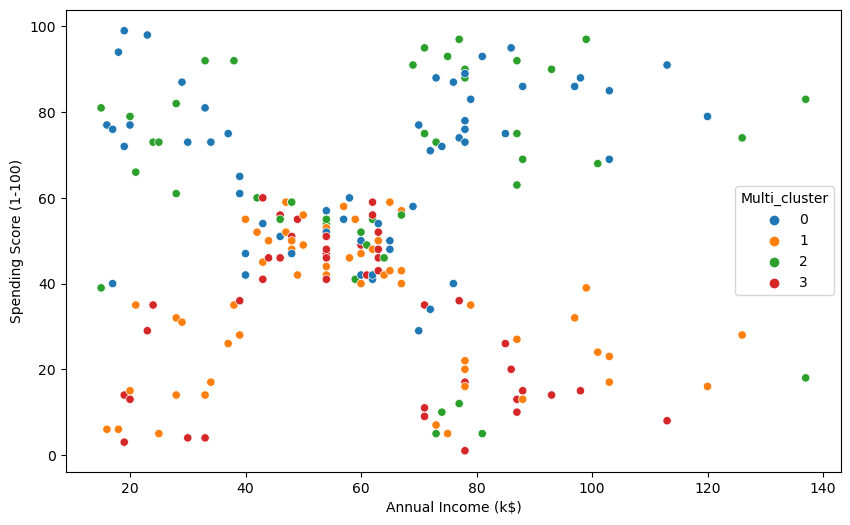

In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "Multi_cluster", palette="tab10")
plt.savefig("multi_cluster")

## Conclusion

Base on the scatterplot for both bivariate and multivariate clustering,
The bivariate clustering is best suoted for the customer segmentation

#### Target Cluster
* Target group would be cluster 0 which is high in both the Annual Income and Spending Score
* 54 percent of cluster shoppers are women while 46 percent are men. We should for ways to attract there customers using a marketing campaign targeting popuer items in this cluster
* Cluster 4 presents am interesting opportunity to market to the customer for sales event on popular items.

In [147]:
df.to_csv("cluster.csv")

Create a github readme analysis presentation using the attach file and the following instruction:

The project is about customer segmentation using kmean:

The result for the bi_variate clustering using the Annual Income and Spending Score column is as follows:
df.groupby("Income_Spending_cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

                            Age	        Annual Income (k$)	Spending Score (1-100)
Income_Spending_cluster			
0	                        32.692308	86.538462	        82.128205
1	                        42.716049	55.296296	        49.518519
2	                        41.114286	88.200000	        17.114286
3	                        45.217391	26.304348	        20.913043
4	                        25.272727	25.727273	        79.363636
The scatterplot graph for it is attached called bi_cluster.png
The technique use for both technique is elbow which is use topick the number of n_clustering.
the graph for the elbow is also attached


The result for the multi_variate clustering using the Annual Income and Spending Score column is as follows:
df.groupby("Multi_cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

                    Age	     Annual Income (k$)	Spending Score (1-100)
Multi_cluster			
0	              28.438596	 59.666667	         67.684211
1	              48.109091	 58.818182	         34.781818
2	              27.666667	 64.933333	         64.822222
3	              52.511628	 59.395349	         31.441860

Base on the result and the graph:

This is my Analysis:
Base on the scatterplot for both bivariate and multivariate clustering,
The bivariate clustering is best suoted for the customer segmentation

#### Target Cluster
* Target group would be cluster 0 which is high in both the Annual Income and Spending Score
* 54 percent of cluster shoppers are women while 46 percent are men. We should for ways to attract there customers using a marketing campaign targeting popuer items in this cluster
* Cluster 4 presents am interesting opportunity to market to the customer for sales event on popular items.


Using this information, create me github readme file for this project using the instruction, result table and attach graph